In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time as t
import random as r

In [10]:
def generateCluster(centerX, centerY, spread, nPoints):
    return [
        [r.gauss(centerX, spread), r.gauss(centerY, spread)]
        for _ in range(nPoints)
    ]

cluster1 = generateCluster(2, 2, 0.6, 100)
cluster2 = generateCluster(7, 7, 0.6, 100)
cluster3 = generateCluster(12, 2, 0.6, 100)

points2D = cluster1 + cluster2 + cluster3
X, y = [i[0] for i in points2D], [i[1] for i in points2D]

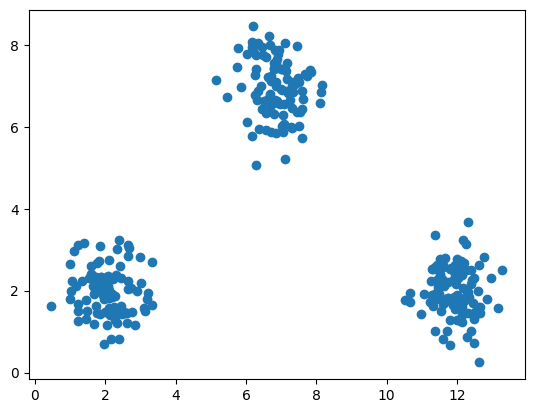

In [11]:
plt.scatter(X, y)
plt.show()

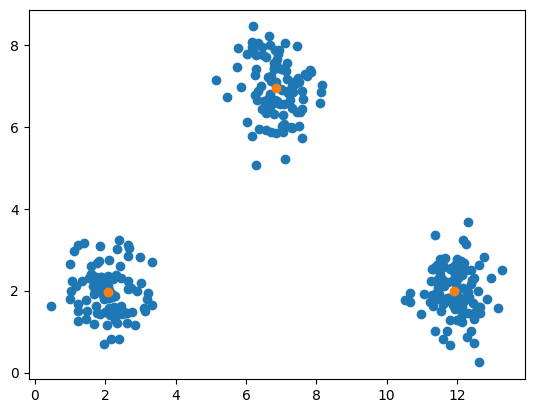

2
[(11.918506670291094, 1.998877758458201), (2.066682230493936, 1.9638243787670038), (6.861561011115487, 6.949140124245845)]


In [14]:
class KMeansClustering:
    def __init__(self, X, y, centroidAmount):
        self.X = X
        self.y = y
        self.centroidAmount = centroidAmount
        
        self.createCentroids()
    
    def createCentroids(self):
        self.centroids = []
        for _ in range(self.centroidAmount):
            centroidX = np.random.randint(min(self.X), max(self.X)+1)
            centroidY = np.random.randint(min(self.y), max(self.y)+1)
            self.centroids.append((centroidX, centroidY))
    
    def computeClosestCentroidForData(self):
        pointCentroidRelation = {centroid:[] for centroid in self.centroids}
        for point in zip(self.X, self.y):
            pointDist = []
            for centroid in self.centroids:
                dist = ((centroid[1] - point[1])**2 + (centroid[0] - point[0])**2)**0.5
                pointDist.append((centroid, dist))
            pointDist.sort(key=lambda x: x[-1])
            pointCentroidRelation[pointDist[0][0]].append(point)
        return pointCentroidRelation

    def fit(self):
        pointCentroidRelation = self.computeClosestCentroidForData()
        for centroid in pointCentroidRelation:
            newCentroidValue = (np.mean([i[0] for i in pointCentroidRelation[centroid]]), np.mean([i[1] for i in pointCentroidRelation[centroid]]))
            self.centroids[self.centroids.index(centroid)] = newCentroidValue

    def predict(self, point):
        pointDist = []
        for centroid in self.centroids:
            dist = ((centroid[1] - point[1])**2 + (centroid[0] - point[0])**2)**0.5
            pointDist.append((centroid, dist))
        pointDist.sort(key=lambda x: x[-1])
        return self.centroids.index(pointDist[0][0])

plt.ion()
cluster = KMeansClustering(X, y, 3)
for _ in range(10):
    clear_output(wait=True)
    plt.scatter(X, y)
    plt.scatter([i[0] for i in cluster.centroids], [i[1] for i in cluster.centroids])
    cluster.fit()
    plt.show()
    t.sleep(1)
print(cluster.predict((7, 9)))
print(cluster.centroids)